This dataset contains information about the best-selling game consoles of all time. The data includes the console name, manufacturer, release year, total units sold, and some other information. The dataset covers a wide range of consoles, from the earliest releases to the current generation of consoles.

The dataset can be used to analyze the popularity of different game consoles over time. It can also be used to identify trends in the gaming industry and to compare the performance of different manufacturers. Researchers, game developers, and marketers can benefit from this dataset to make informed decisions based on the past performance of game consoles in the market.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:\\Users\\user\\Desktop\\Nithya VB\\Project\\Game_best_selling.csv')

##### Basic Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Console_Name          51 non-null     object 
 1   Type                  51 non-null     object 
 2   Company               51 non-null     object 
 3   Released_Year         51 non-null     int64  
 4   Discontinuation_Year  51 non-null     int64  
 5   Units_sold            51 non-null     float64
 6   Remarks               16 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 2.9+ KB


In [4]:
df.shape

(51, 7)

In [5]:
df.describe()

,Released_Year,Discontinuation_Year,Units_sold
count,51.000000,51.000000,51.000000
mean,1996.058824,1844.803922,35.549412
std,12.378064,543.657319,42.608844
min,1976.000000,0.000000,1.000000
25%,1987.500000,1992.000000,3.200000
50%,1994.000000,1998.000000,13.560000
75%,2004.500000,2011.500000,60.205000
max,2020.000000,2020.000000,155.000000


In [6]:
df.head()

,Console_Name,Type,Company,Released_Year,Discontinuation_Year,Units_sold,Remarks
0,PlayStation 2,Home,Sony,2000,2013,155.00,Final sales are greater than 155 million
1,Nintendo DS,Handheld,Nintendo,2004,2013,154.02,NaN
2,Nintendo Switch,Hybrid,Nintendo,2017,0,122.55,NaN
3,Game Boy,Handheld,Nintendo,1989,2003,64.42,The Game Boy (1989) and the Game Boy Color (19...
4,Game Boy Color,Handheld,Nintendo,1998,2003,44.06,NaN


In [7]:
df.dtypes.index

Index(['Console_Name', 'Type', 'Company', 'Released_Year',
       'Discontinuation_Year', 'Units_sold', 'Remarks'],
      dtype='object')

In [8]:
categorical_columns = df.dtypes[df.dtypes == 'object'].index
print(categorical_columns)

Index(['Console_Name', 'Type', 'Company', 'Remarks'], dtype='object')


In [9]:
numeric_columns = df.dtypes[df.dtypes != 'object'].index
print(numeric_columns)

Index(['Released_Year', 'Discontinuation_Year', 'Units_sold'], dtype='object')


Here ther are three categorical and four continuous variables.

In [10]:
df.isnull().sum()

Console_Name             0
Type                     0
Company                  0
Released_Year            0
Discontinuation_Year     0
Units_sold               0
Remarks                 35
dtype: int64

In [11]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Console_Name
False    51
Name: Console_Name, dtype: int64

Type
False    51
Name: Type, dtype: int64

Company
False    51
Name: Company, dtype: int64

Released_Year
False    51
Name: Released_Year, dtype: int64

Discontinuation_Year
False    51
Name: Discontinuation_Year, dtype: int64

Units_sold
False    51
Name: Units_sold, dtype: int64

Remarks
True     35
False    16
Name: Remarks, dtype: int64



we can see only Remaks column have 35 missing values out of 51 samples

<AxesSubplot:>

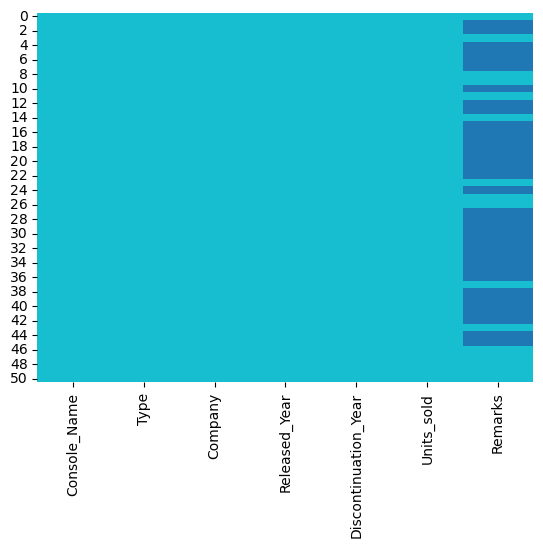

In [12]:
sns.heatmap(df.isnull(),cbar=False,cmap='tab10_r')

In [13]:
df = df.drop(['Remarks'], axis = 1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Console_Name          51 non-null     object 
 1   Type                  51 non-null     object 
 2   Company               51 non-null     object 
 3   Released_Year         51 non-null     int64  
 4   Discontinuation_Year  51 non-null     int64  
 5   Units_sold            51 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 2.5+ KB


In [15]:
df.Console_Name.value_counts()

PlayStation 2                        1
Color TV-Game                        1
PC Engine/TurboGrafx-16              1
Sega Saturn                          1
Dreamcast                            1
Master System(Brazilian variants)    1
Dendy(Famiclone)                     1
Super NES Classic Edition            1
Famicom Disk System                  1
NES Classic Edition                  1
WonderSwan                           1
Sega Pico                            1
Intellivision                        1
Sega Master System                   1
Mega Drive(Brazilian variants)       1
N-Gage                               1
Sega CD                              1
ColecoVision                         1
Magnavox Odyssey                     1
PC Engine CD-ROM                     1
Atari 7800                           1
Atari Lynx                           1
Philips CD-i                         1
Telstar                              1
Sega Game Gear                       1
PlayStation Vita         

Text(0.5, 1.0, 'Barplot of Console_Name')

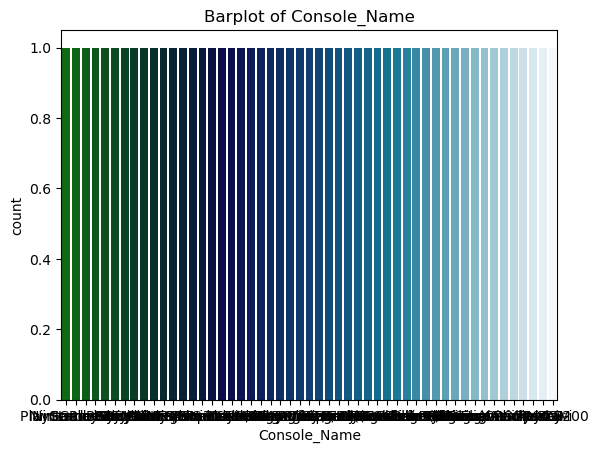

In [16]:
sns.countplot(x = 'Console_Name', data = df, palette = 'ocean')
plt.title('Barplot of Console_Name')

In [17]:
df.Type.value_counts()

Home                   31
Handheld               12
Dedicated               4
Home console add-on     3
Hybrid                  1
Name: Type, dtype: int64

Text(0.5, 1.0, 'Barplot of Type')

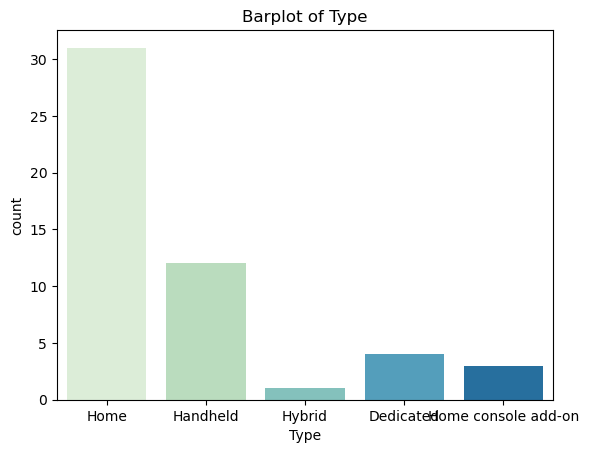

In [18]:
sns.countplot(x = 'Type', data = df, palette = 'GnBu')
plt.title('Barplot of Type')

In [19]:
df.Company.value_counts()

Nintendo                   17
Sony                        7
Sega                        7
Microsoft                   4
Atari                       4
Tectoy                      2
Coleco                      2
NEC/Hudson Soft[note 6]     1
Micro Genius                1
Bandai                      1
Mattel                      1
Nokia                       1
Magnavox/Philips            1
NEC                         1
Philips                     1
Name: Company, dtype: int64

Text(0.5, 1.0, 'Barplot of Company')

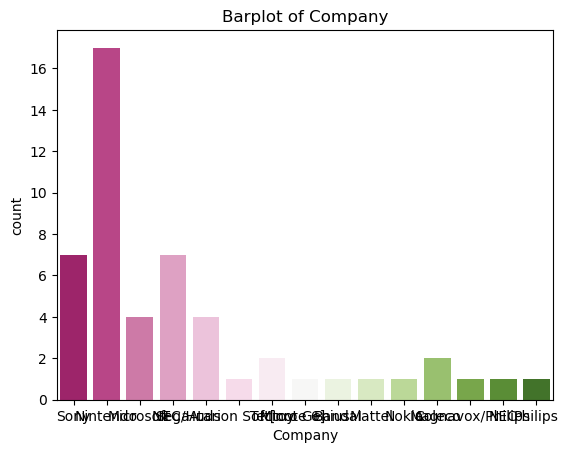

In [20]:
sns.countplot(x = 'Company', data = df, palette = 'PiYG')
plt.title('Barplot of Company')

In [21]:
countinue_column = df.select_dtypes(include= 'number')

In [22]:
countinue_column.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Released_Year         51 non-null     int64  
 1   Discontinuation_Year  51 non-null     int64  
 2   Units_sold            51 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


In [23]:
countinue_column.corr()

,Released_Year,Discontinuation_Year,Units_sold
Released_Year,1.000000,-0.493758,0.391941
Discontinuation_Year,-0.493758,1.000000,-0.242645
Units_sold,0.391941,-0.242645,1.000000


<AxesSubplot:>

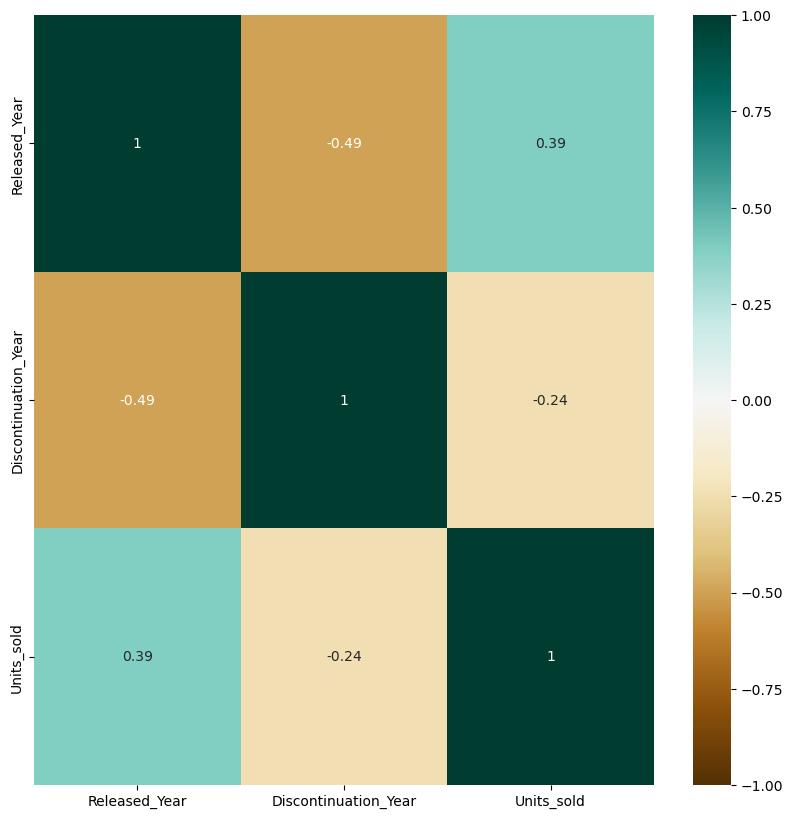

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(countinue_column.corr(), annot=True, vmin= -1, vmax=1, cmap = 'BrBG')

Units_sold is the target variable.

In [25]:
import warnings
warnings.filterwarnings("ignore")

In [26]:
numericfeature=df.iloc[:,[3,4,5]]

<Figure size 500x500 with 0 Axes>

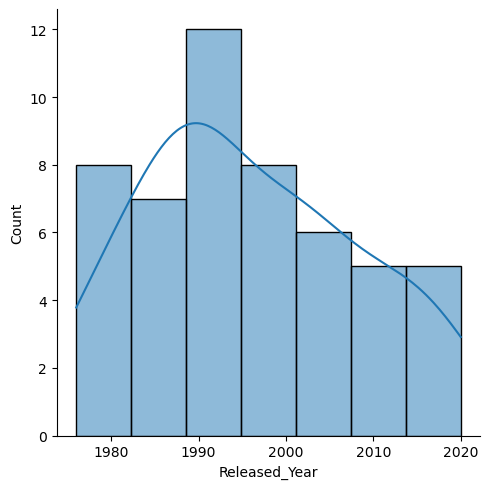

<Figure size 500x500 with 0 Axes>

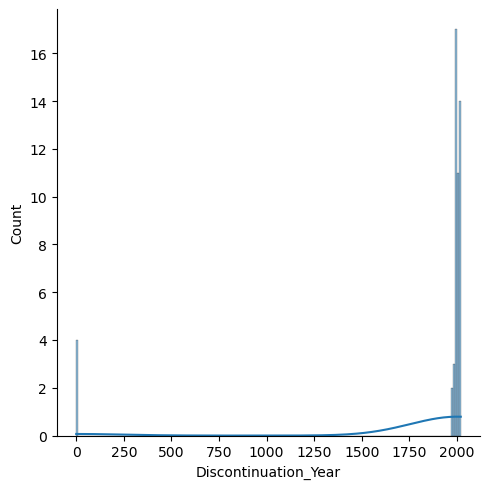

<Figure size 500x500 with 0 Axes>

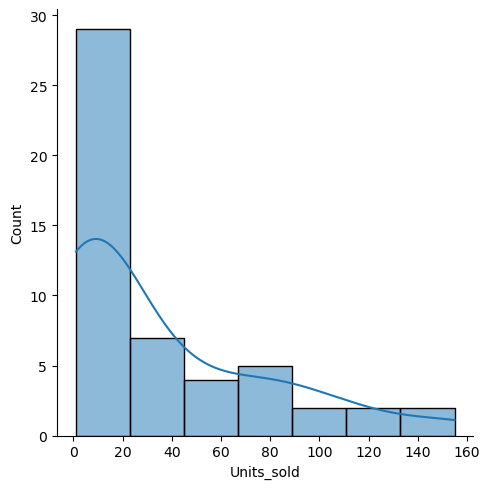

In [27]:
# now we can have a better idea of which variable is a distribution bell shaped
for i in numericfeature:
    plt.figure(figsize=(5,5))
    sns.displot(df[i],kde=True)
    plt.show()

we can see that the target value is rightskewed. lets now transform the data using log.

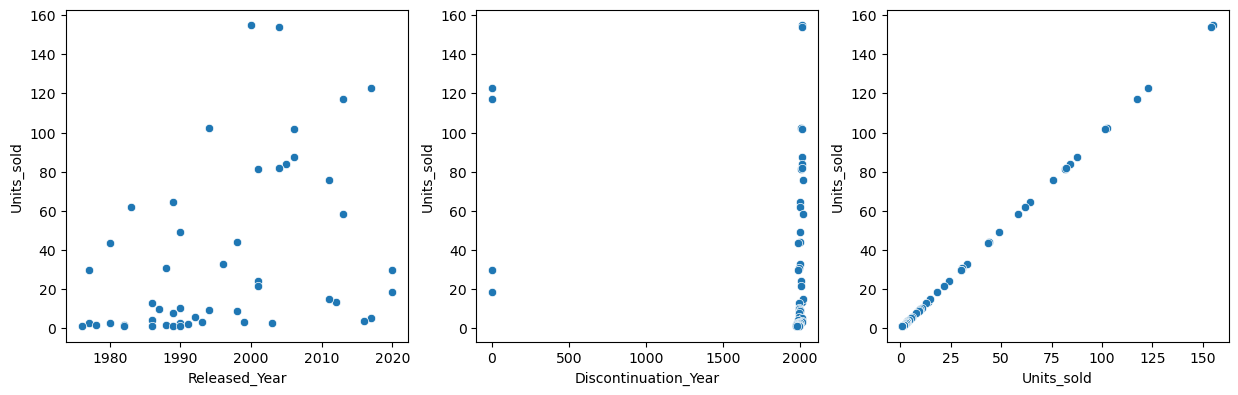

In [28]:
# scatter plot for all numerical attributes
plt.figure(figsize = (15,25))
for i in enumerate (numericfeature):
    plt.subplot(5,3,i[0]+1)
    sns.scatterplot(x = i[1],y = 'Units_sold',data = df)

<AxesSubplot:xlabel='Units_sold'>

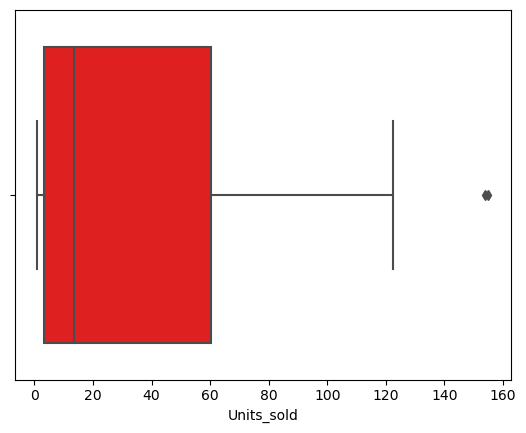

In [29]:
sns.boxplot(df['Units_sold'], color = 'red')

<AxesSubplot:xlabel='Discontinuation_Year'>

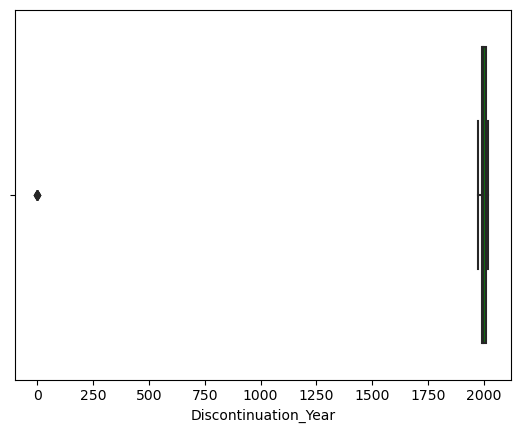

In [30]:
sns.boxplot(df['Discontinuation_Year'], color = 'green')

In [31]:
df2 = df['Discontinuation_Year']
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
df_IQR = Q3 - Q1
lower_limit = Q1 - (1.5 * df_IQR)
upper_limit = Q3 + (1.5 * df_IQR)

In [32]:
df2 = df.loc[(df['Discontinuation_Year'] < upper_limit) & (df['Discontinuation_Year'] > lower_limit)]
print('Before removing outliers:', len(df))
print('After removing outliers:', len(df2))
print('outliers:', len(df)-len(df2))

Before removing outliers: 51
After removing outliers: 47
outliers: 4


In [33]:
df2 = df.copy()
df2.loc[(df2['Discontinuation_Year']>upper_limit), 'Discontinuation_Year'] = upper_limit
df2.loc[(df2['Discontinuation_Year']<lower_limit), 'Discontinuation_Year'] = lower_limit

<AxesSubplot:xlabel='Discontinuation_Year'>

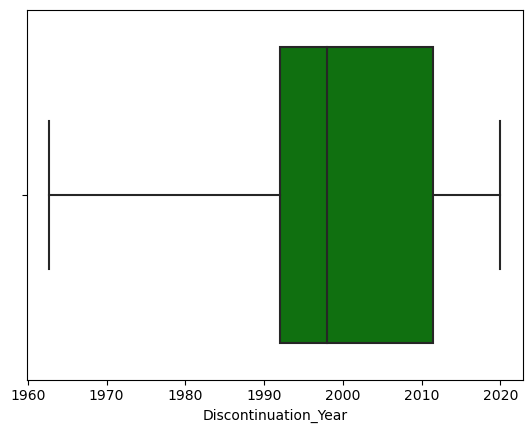

In [34]:
sns.boxplot(df2['Discontinuation_Year'], color = 'green')

<AxesSubplot:xlabel='Released_Year'>

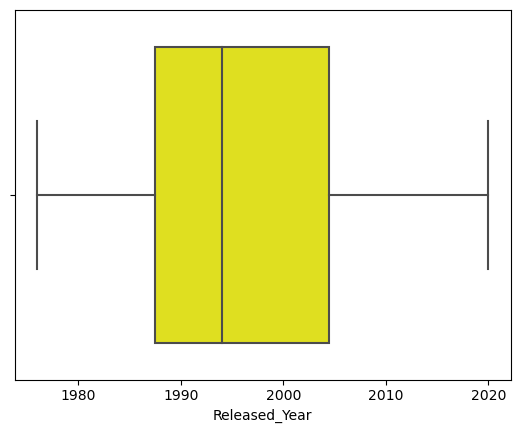

In [35]:
sns.boxplot(df['Released_Year'], color = 'yellow')

In [36]:
from scipy.stats import shapiro
shapiro_test = shapiro(df.Units_sold)
shapiro_test

ShapiroResult(statistic=0.7929124236106873, pvalue=4.960537012266286e-07)

since the pvalve < 0.05 thus we reject the null hypothesis.it can be concluded that data is not normally distributed
since the target variable  is not normally distributed  so we can transform the data using log due to leftskewness

In [37]:
df['log_Units_sold']=np.log(df['Units_sold'])

In [38]:
df= df.drop(['Units_sold'],axis=1)

<AxesSubplot:xlabel='log_Units_sold', ylabel='Count'>

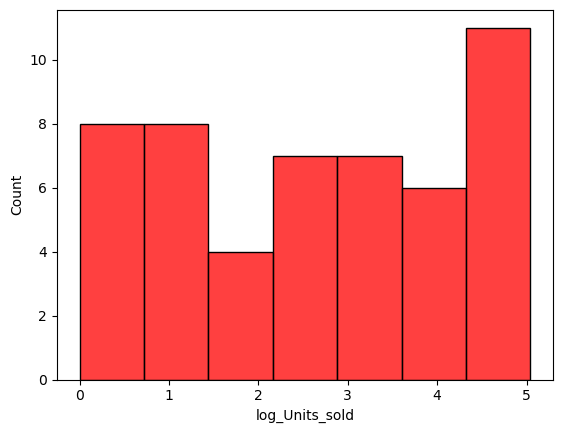

In [39]:
sns.histplot(df.log_Units_sold,color="red")

<AxesSubplot:xlabel='log_Units_sold'>

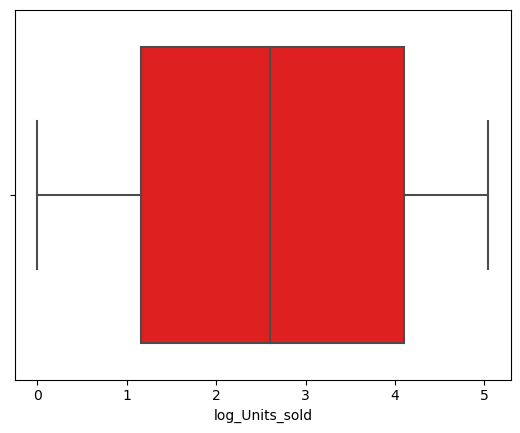

In [40]:
sns.boxplot(df['log_Units_sold'], color = 'red')

<AxesSubplot:xlabel='log_Units_sold', ylabel='Density'>

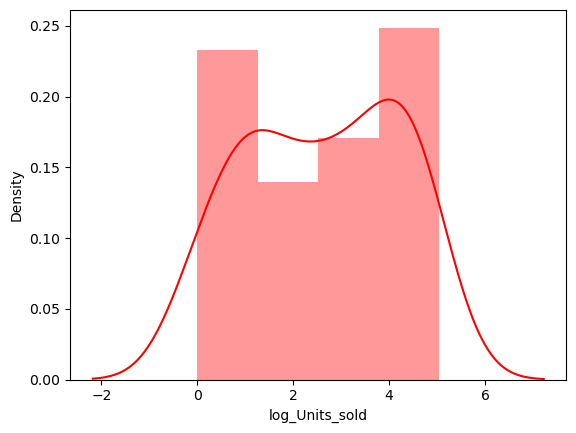

In [41]:
sns.distplot(df.log_Units_sold,color="red")

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Console_Name          51 non-null     object 
 1   Type                  51 non-null     object 
 2   Company               51 non-null     object 
 3   Released_Year         51 non-null     int64  
 4   Discontinuation_Year  51 non-null     int64  
 5   log_Units_sold        51 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 2.5+ KB


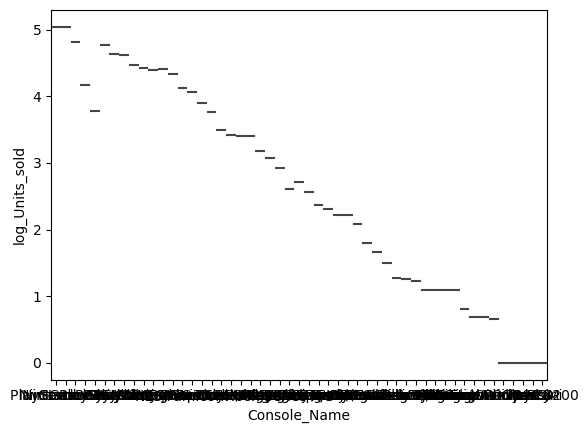

In [43]:
ax = sns.boxenplot(x="Console_Name", y="log_Units_sold", data=df)

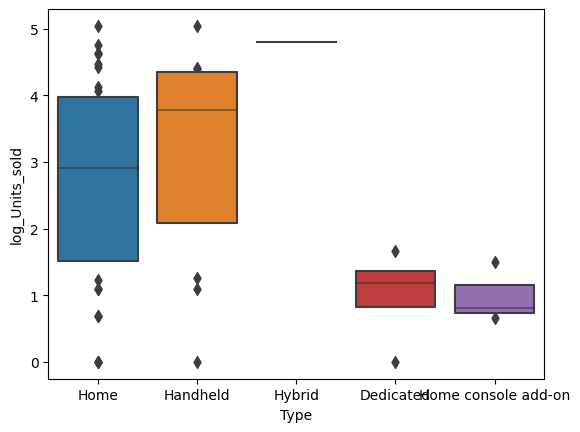

In [44]:
ax = sns.boxenplot(x="Type", y="log_Units_sold", data=df)

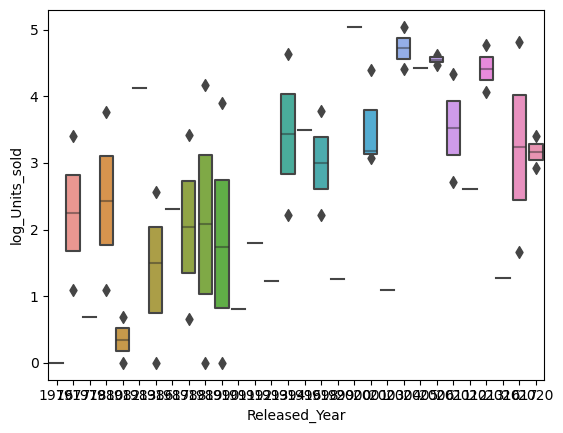

In [45]:
ax = sns.boxenplot(x="Released_Year", y="log_Units_sold", data=df)

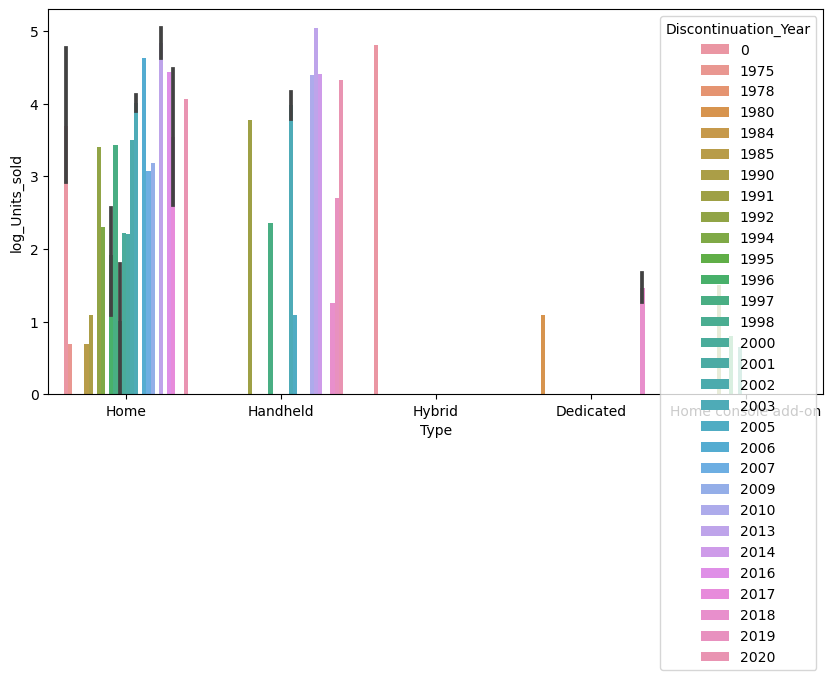

In [46]:
plt.figure(figsize=(10,5))
sns.barplot(x='Type',y='log_Units_sold',data=df,hue='Discontinuation_Year')
plt.show()

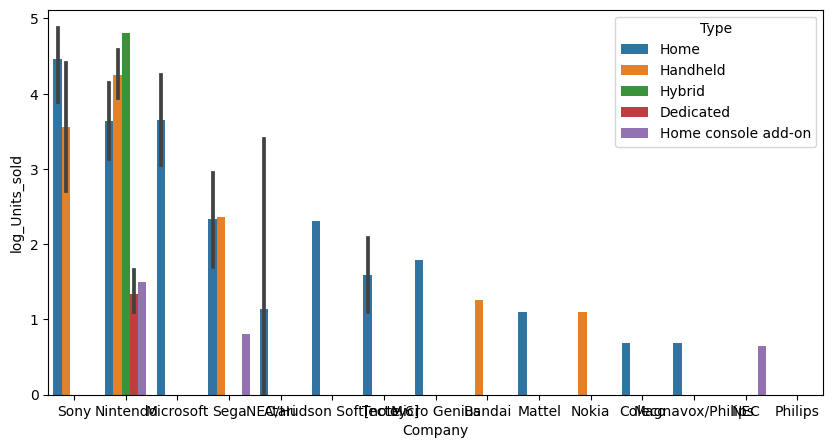

In [47]:
plt.figure(figsize=(10,5))
sns.barplot(x='Company',y='log_Units_sold',data=df,hue='Type')
plt.show()

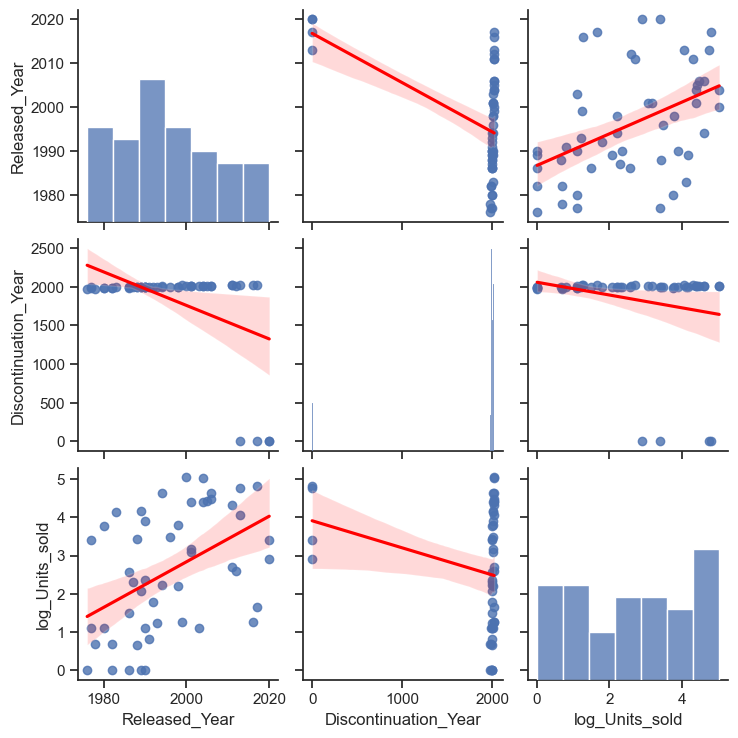

In [48]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df, kind="reg", plot_kws={'line_kws':{'color':'red'}})
plt.show()

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Console_Name          51 non-null     object 
 1   Type                  51 non-null     object 
 2   Company               51 non-null     object 
 3   Released_Year         51 non-null     int64  
 4   Discontinuation_Year  51 non-null     int64  
 5   log_Units_sold        51 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 2.5+ KB


In [53]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [61]:
df1 = pd.get_dummies(df, drop_first=False)
df1.head()

,Released_Year,Discontinuation_Year,log_Units_sold,Console_Name_Atari 2600,Console_Name_Atari 5200,Console_Name_Atari 7800,Console_Name_Atari Lynx,Console_Name_ColecoVision,Console_Name_Color TV-Game,Console_Name_Dendy(Famiclone),...,Company_Micro Genius,Company_Microsoft,Company_NEC,Company_NEC/Hudson Soft[note 6],Company_Nintendo,Company_Nokia,Company_Philips,Company_Sega,Company_Sony,Company_Tectoy
0,2000,2013,5.043425,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2004,2013,5.037082,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2017,0,4.808519,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1989,2003,4.165424,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1998,2003,3.785552,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [62]:
X = df1.iloc[:, df1.columns != 'log_Units_sold']
y = df1.iloc[:, df1.columns == 'log_Units_sold']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [64]:
lr = LinearRegression()

In [65]:
lr.fit(X_train, y_train)

LinearRegression()

In [66]:
y_pred = lr.predict(X_test)

In [67]:
# Compute the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.5546203961986107


In [68]:
# Compute the R^2 score
score = r2_score(y_test, y_pred)
print("R^2 Score:", score)

R^2 Score: 0.6554911142074651
